In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload

import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *

In [3]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}
wanted_months = [3,4,5,6,7,8,9]

# Dataset A

In [4]:
selected_features_a = selected_features.copy()
selected_features_a.remove("direct_rad:W")
hyperparameters_a = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_a = wanted_months

In [5]:
X_train_a = prepare_X(X_observed_a.copy(), X_estimated_a.copy(), selected_features_a.copy(), wanted_months_a.copy())
X_train_a, y_train_a = resize_training_data(X_train_a.copy(), y_a.copy())
X_test_a = prepare_testdata_rf_a(X_test_a.copy(), selected_features_a.copy())

In [6]:
rf_a = Random_Forest(hyperparameters_a, X_train_a, X_test_a, y_train_a)

In [7]:
#rf_a_cross_val_predictions,rf_a_cross_val_actuals, rf_a_cross_val_mae_mean = rf_a.cross_val_stack(X_train_a, y_train_a)

In [8]:
rf_a.cross_validate(X_train_a, y_train_a)

Cross-validation scores: [293.46558639 289.0807795  294.38191062 292.09294334 131.152827  ]
Mean cross-validation score: 260.0348093713877


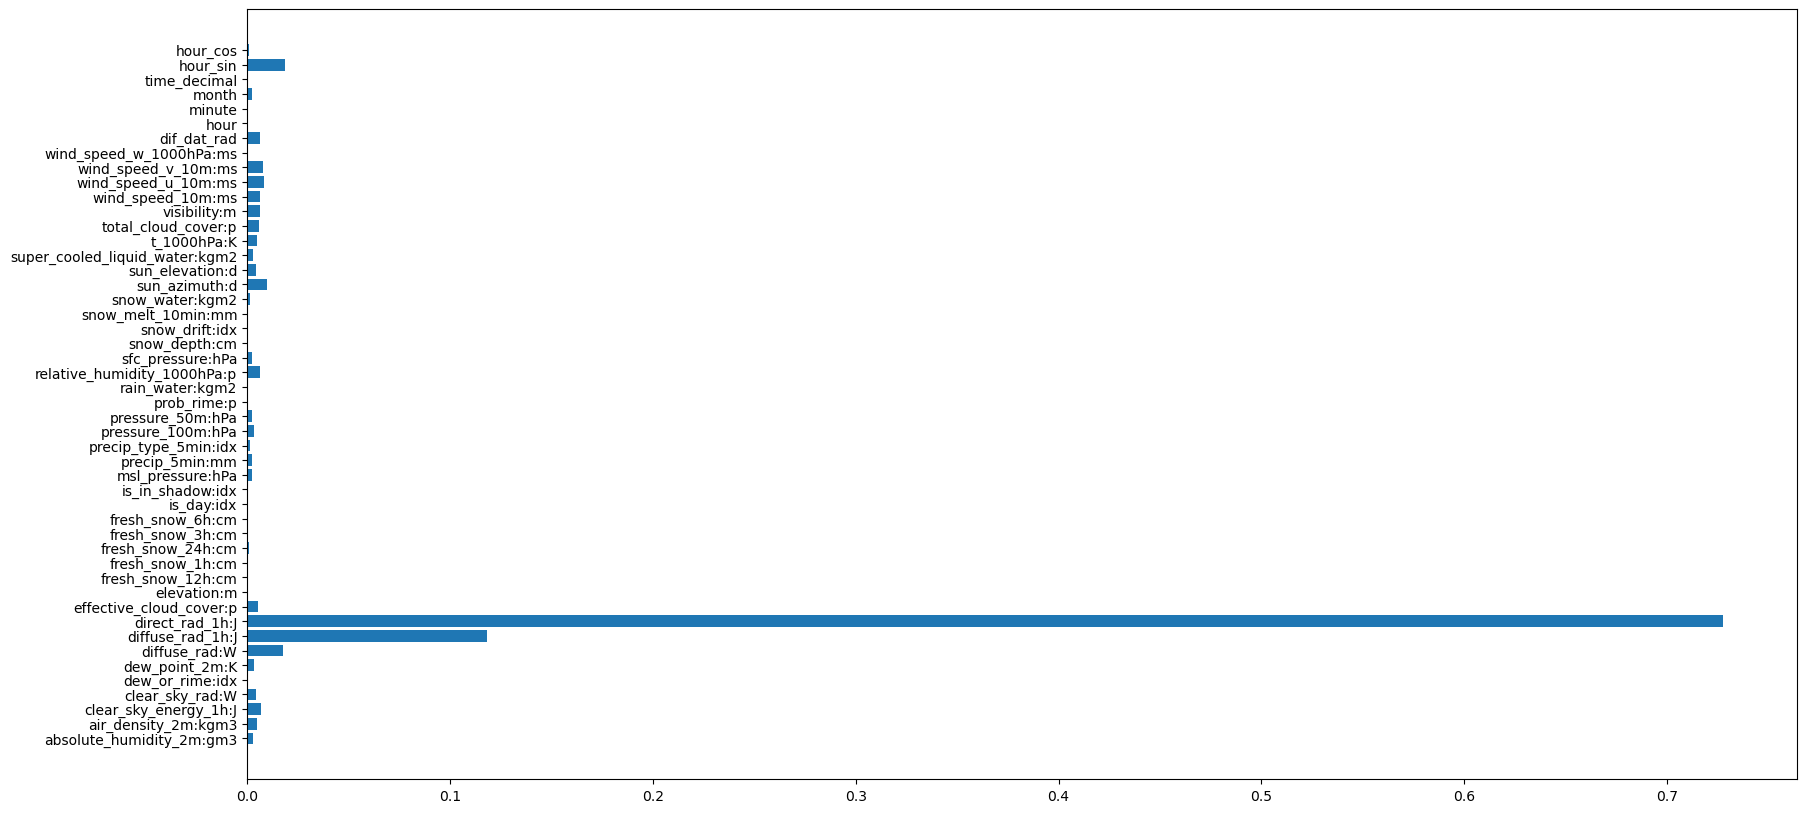

In [9]:
rf_a.fit()
rf_a.pred()
rf_a_test_pred = rf_a.prediction
rf_a.feature_importence_plot()

In [10]:
#rf_a.corr_plot()

In [29]:
rf_a_test_pred

array([0.00000000e+00, 0.00000000e+00, 4.03333333e-03, 5.95095618e+01,
       4.19427560e+02, 8.74887239e+02, 1.79605541e+03, 2.35899943e+03,
       2.37894430e+03, 2.64567389e+03, 2.73790018e+03, 2.89564875e+03,
       2.68015522e+03, 2.48582052e+03, 2.47418453e+03, 1.71611439e+03,
       1.12217702e+03, 6.21980562e+02, 2.48521733e+02, 1.83258531e+01,
       5.68333333e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.21641866e+00, 1.35726705e+02,
       5.14002327e+02, 1.16773353e+03, 1.83289693e+03, 2.45711838e+03,
       3.67092616e+03, 3.96960755e+03, 3.87666964e+03, 3.92997811e+03,
       3.84872239e+03, 3.81818113e+03, 3.08799762e+03, 2.76205112e+03,
       1.71903826e+03, 8.97232849e+02, 4.00740222e+02, 8.94827084e+01,
       1.52469444e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.31267063e-02, 3.23644910e+01, 2.27077505e+02,
       5.81820214e+02, 1.44366452e+03, 2.56584358e+03, 3.46600082e+03,
      

# Dataset B

In [11]:
selected_features_b = selected_features.copy()
hyperparameters_b = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_b = wanted_months

In [12]:
y_to_fit_b, y_to_predict_b = augment_y_b(y_b.copy())
y_augmented_b = predict_y_with_random_forest(y_to_fit_b.copy(),y_to_predict_b.copy(),X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy(), hyperparameters_b.copy())

penis


In [13]:
print(y_to_fit_b.shape)
print(y_to_predict_b.shape)

(20144, 2)
(12704, 2)


In [14]:
X_train_b_before_prepare = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy())
X_train_b, y_train_b = resize_training_data(X_train_b_before_prepare.copy(), y_to_fit_b.copy())
X_test_b = prepare_testdata_rf_a(X_test_b.copy(), selected_features_b.copy())
rf_b = Random_Forest(hyperparameters_b.copy(), X_train_b.copy(), X_test_b.copy(), y_train_b.copy())

In [15]:
#rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [16]:
rf_b.cross_validate(X_train_b, y_train_b)

Cross-validation scores: [54.10287168 53.32660563 53.62327258 47.63659679 27.26515737]
Mean cross-validation score: 47.19090081203992


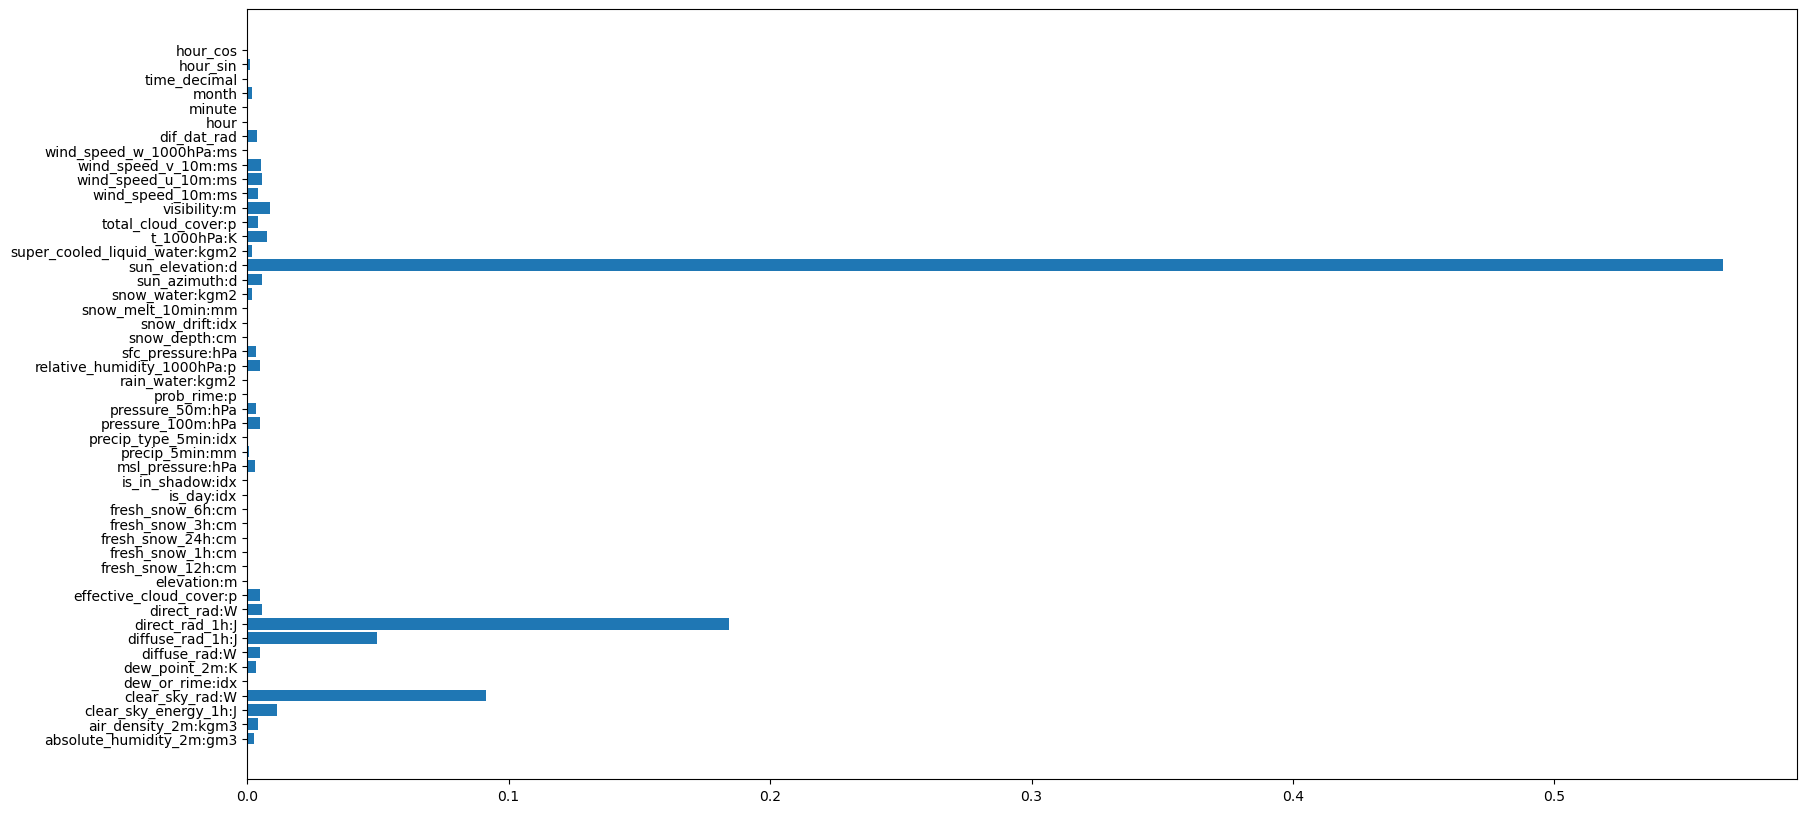

In [17]:
rf_b.fit()
rf_b.pred()
rf_b_test_pred = rf_b.prediction
rf_b.feature_importence_plot()

# Dataset C

In [18]:
selected_features_c = selected_features.copy()
hyperparameters_c = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
wanted_months_c = wanted_months

In [19]:
y_to_fit_c, y_to_predict_c = augment_y_c(y_c.copy())
y_augmented_c = predict_y_with_random_forest(y_to_fit_c.copy(),y_to_predict_c.copy(),X_observed_c.copy(), X_estimated_c.copy(), selected_features_c.copy(), wanted_months_c.copy(), hyperparameters_c.copy())

penis


In [20]:
print(y_to_fit_c.shape)
print(y_to_predict_c.shape)

(12888, 2)
(19267, 2)


In [21]:
X_train_c = prepare_X(X_observed_c.copy(), X_estimated_c.copy(), selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c.copy(), y_augmented_c)
X_test_c = prepare_testdata_rf_a(X_test_c.copy(), selected_features_c)

In [22]:
rf_c = Random_Forest(hyperparameters_c, X_train_c.copy(), X_test_c.copy(), y_train_c.copy())

In [23]:
#rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [24]:
rf_c.cross_validate(X_train_c, y_train_c)

Cross-validation scores: [38.79424026 44.94972295 18.58114231 21.94067787 19.31997639]
Mean cross-validation score: 28.717151955529182


In [25]:
rf_c.fit()
rf_c.pred()
rf_c_test_pred = rf_c.prediction

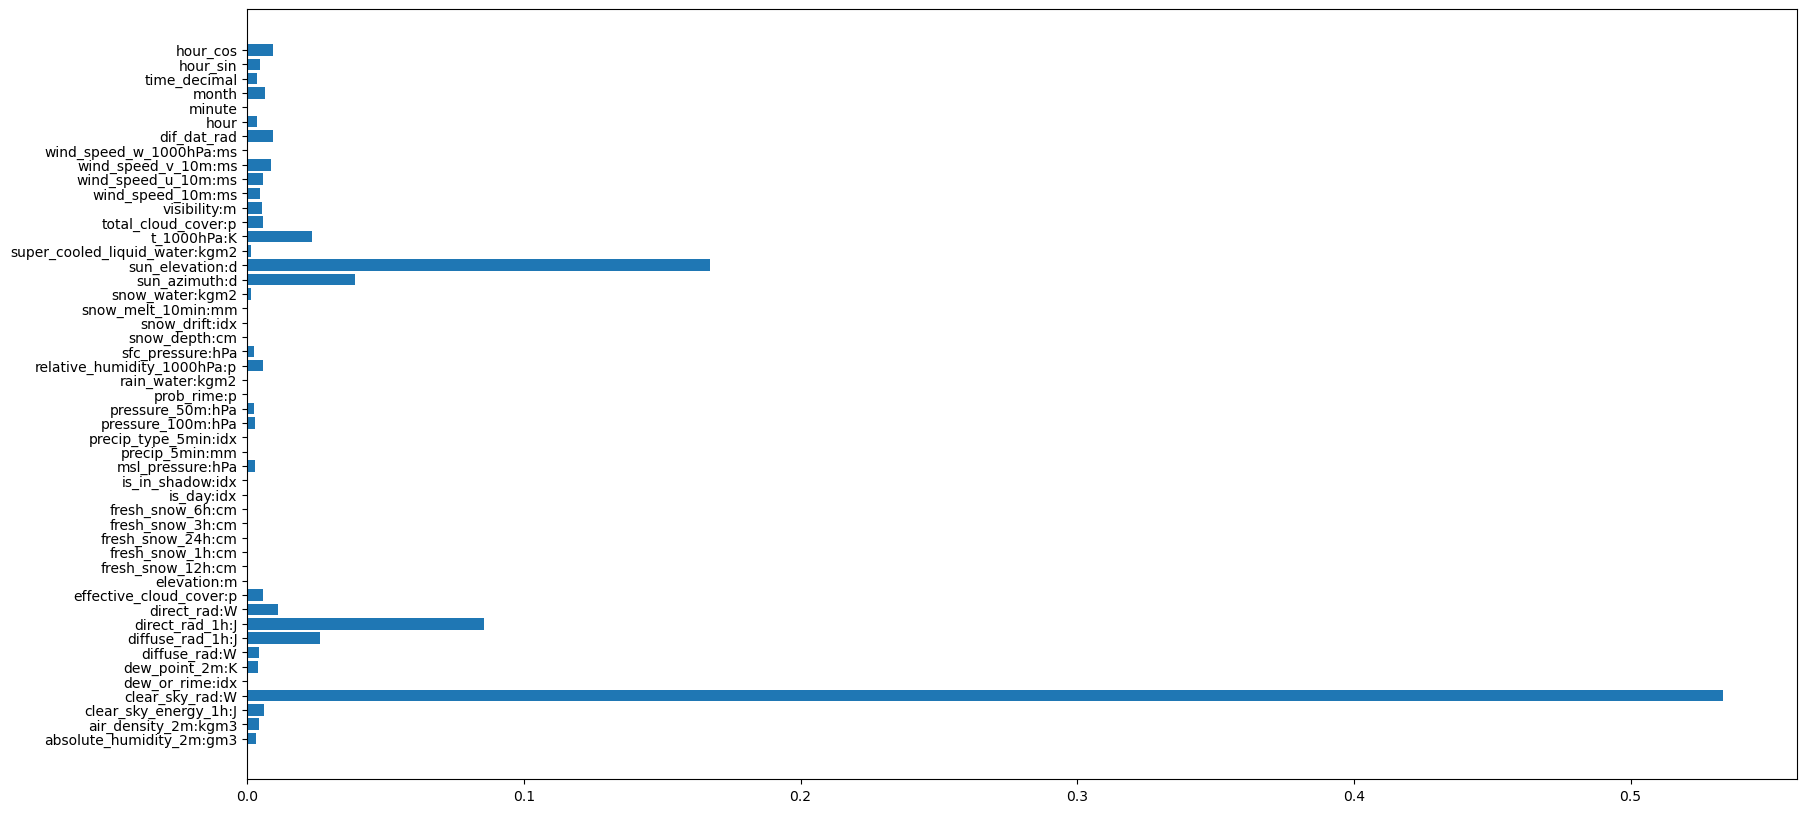

In [26]:
rf_c.feature_importence_plot()

In [27]:
y_pred_rf_test = np.concatenate((rf_a_test_pred, rf_b_test_pred, rf_c_test_pred), axis=0)
submission("trener_rf_på_augmented_y_v3.csv", y_pred_rf_test, "../../")

In [28]:
y_augmented_b.to_excel("y_augmented_b.xlsx", index=False)
